# Cymetric Example for materials exchanges

This example walks through how to extract and plot information about materials exchanges in a Cyclus simulation

### Learning Objectives:
* Open an SQLite database with Cymetric
* Store a metric as a pandas DataFrame
* Manipulate the contents and column names of a DataFrame
* Plot the data in a DataFrame  

In [1]:
import cymetric as cym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Remove any current database with the same name, run cyclus to have the most updated output database
! rm recycle.sqlite
! cyclus recycle.xml -o recycle.sqlite #-o flag specifies output file name

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by 

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.2999999 (1)
Clp0006I 1  Obj 270
Clp0000I Optimal - objective value 270
Clp0032I Optimal objective 270 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 270
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 270
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 270
Clp0006I 0  Obj 270 Primal inf 1.9249997 (3)
Clp0006I 2  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by rounding after 2 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 2
Cbc0013I At root node, 1 cuts changed objective from 270 to 360 in 2 passes
Cbc0014I Cut generator 0 (Probin

Clp0006I 1  Obj 270
Clp0000I Optimal - objective value 270
Clp0032I Optimal objective 270 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 270
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 270
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 270
Clp0006I 0  Obj 270 Primal inf 1.9249997 (3)
Clp0006I 2  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by rounding after 2 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 2
Cbc0013I At root node, 1 cuts changed objective from 270 to 360 in 2 passes
Cbc0014I Cut generator 0 (Probing) - 1 row cuts average 2.0 elements, 1 column cuts (1 active)  in 0.000 seconds - new frequency is -10

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.2999999 (1)
Clp0006I 1  Obj 270
Clp0000I Optimal - objective value 270
Clp0032I Optimal objective 270 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 270
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 270
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 270
Clp0006I 0  Obj 270 Primal inf 1.9249997 (3)
Clp0006I 2  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by rounding after 2 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 2
Cbc0013I At root node, 1 cuts changed objective from 270 to 360 in 2 passes
Cbc0014I Cut generator 0 (Pr


Status: Cyclus run successful!
Output location: recycle.sqlite
Simulation ID: 6b4e3634-7dfc-4061-9689-10cca929a10b


In [2]:
db = cym.dbopen('recycle.sqlite')
evaler = cym.Evaluator(db)
transactions = evaler.eval('TransactionQuantity')
transactions = transactions.rename(columns={'TimeCreated':'Time'})

### We can plot the amount of waste sent to the repository as a function of time

To do this, we must know the waste commodities in the simulation and the prototype Id of the nuclear repository. This simulation involves a full recycle of spent fuel (from both the LWR and FRW prototypes), so the only commodity going into the repository is the 'waste' commodity. The prototype Id of the repository is 66 for this simulation

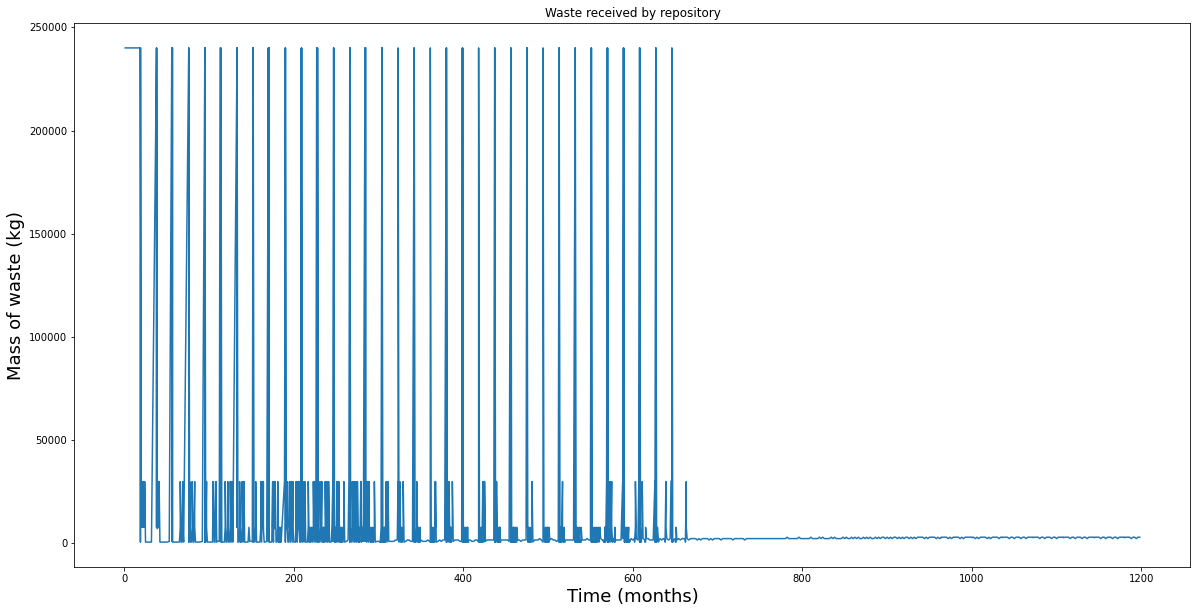

In [27]:
waste = transactions.loc[tq['Commodity'] == 'waste'].sort_values(by='Time') #find transactions that involve waste
waste[['Time','Quantity']].plot(x = 'Time', figsize=(20,10), legend=False)
plt.xlabel('Time (months)',fontsize=18); plt.ylabel('Mass of waste (kg)',fontsize=18)
plt.title('Waste received by repository')
plt.savefig('materials_waste.png')

This figure shows the amount of waste that is sent to the repository at each time step. It is clear that there some amount of waste being sent to the repository at each time step. Even though none of the waste is spent fuel, there is still the waste from the separations facility being sent to the repository once all of the LWR reactors are decommissioned. 

If we want to look at the cumulative amount of waste sent to the repository, we need to first take a cumulative sum of the waste quantity. Then we can create the plot in a similar manner. 

In [28]:
waste['Quantity'] = waste['Quantity'].cumsum() #taking cumulative sum of waste

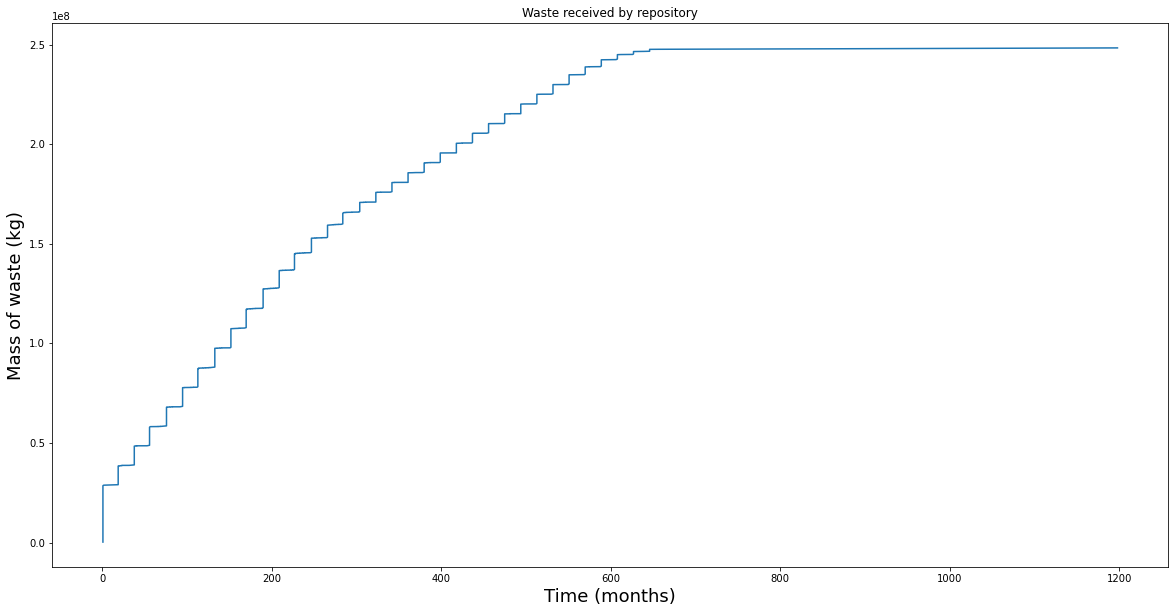

In [29]:
waste[['Time','Quantity']].plot(x = 'Time', figsize=(20,10), legend=False)
plt.xlabel('Time (months)',fontsize=18); plt.ylabel('Mass of waste (kg)',fontsize=18)
plt.title('Waste received by repository')
plt.savefig('materials_waste_cum.png')

### We can look at the amount of LWR UOX fuel
The UOX fuel is created in the enrichment plant, then sent to the reactor prototypes. But the enrichment plant also sends out waste to the repository. 

<bound method DataFrame.cumsum of                                      SimId  TransactionId  ResourceId  ObjId  \
110   6b4e3634-7dfc-4061-9689-10cca929a10b            110        1035    596   
111   6b4e3634-7dfc-4061-9689-10cca929a10b            111        1041    598   
112   6b4e3634-7dfc-4061-9689-10cca929a10b            112        1047    600   
278   6b4e3634-7dfc-4061-9689-10cca929a10b            278        1685   1012   
488   6b4e3634-7dfc-4061-9689-10cca929a10b            488        2776   1630   
709   6b4e3634-7dfc-4061-9689-10cca929a10b            709        3893   2247   
921   6b4e3634-7dfc-4061-9689-10cca929a10b            921        4772   2780   
1143  6b4e3634-7dfc-4061-9689-10cca929a10b           1143        5873   3378   
1371  6b4e3634-7dfc-4061-9689-10cca929a10b           1371        7002   4000   
1594  6b4e3634-7dfc-4061-9689-10cca929a10b           1594        7931   4551   
1828  6b4e3634-7dfc-4061-9689-10cca929a10b           1828        9109   5198   
2063  

In [57]:
uox = transactions.loc[transactions['Commodity'] == 'uox'] #finding transactions that involve waste
frx_fuel = transactions.loc[transactions['Commodity']=='frx_fuel']

In [58]:
uox = uox.loc[uox['ReceiverId']==110]
uox['Total'] = uox['Quantity'].cumsum()

In [56]:
uox

,SimId,TransactionId,ResourceId,ObjId,Time,SenderId,ReceiverId,Commodity,Units,Quantity,Total
110,6b4e3634-7dfc-4061-9689-10cca929a10b,110,1035,596,1,73,110,uox,kg,30000.0,30000.0
111,6b4e3634-7dfc-4061-9689-10cca929a10b,111,1041,598,1,73,110,uox,kg,30000.0,60000.0
112,6b4e3634-7dfc-4061-9689-10cca929a10b,112,1047,600,1,73,110,uox,kg,30000.0,90000.0
278,6b4e3634-7dfc-4061-9689-10cca929a10b,278,1685,1012,18,73,110,uox,kg,30000.0,120000.0
488,6b4e3634-7dfc-4061-9689-10cca929a10b,488,2776,1630,37,73,110,uox,kg,30000.0,150000.0
709,6b4e3634-7dfc-4061-9689-10cca929a10b,709,3893,2247,56,73,110,uox,kg,30000.0,180000.0
921,6b4e3634-7dfc-4061-9689-10cca929a10b,921,4772,2780,75,73,110,uox,kg,30000.0,210000.0
1143,6b4e3634-7dfc-4061-9689-10cca929a10b,1143,5873,3378,94,73,110,uox,kg,30000.0,240000.0
1371,6b4e3634-7dfc-4061-9689-10cca929a10b,1371,7002,4000,113,73,110,uox,kg,30000.0,270000.0
1594,6b4e3634-7dfc-4061-9689-10cca929a10b,1594,7931,4551,132,73,110,uox,kg,30000.0,300000.0


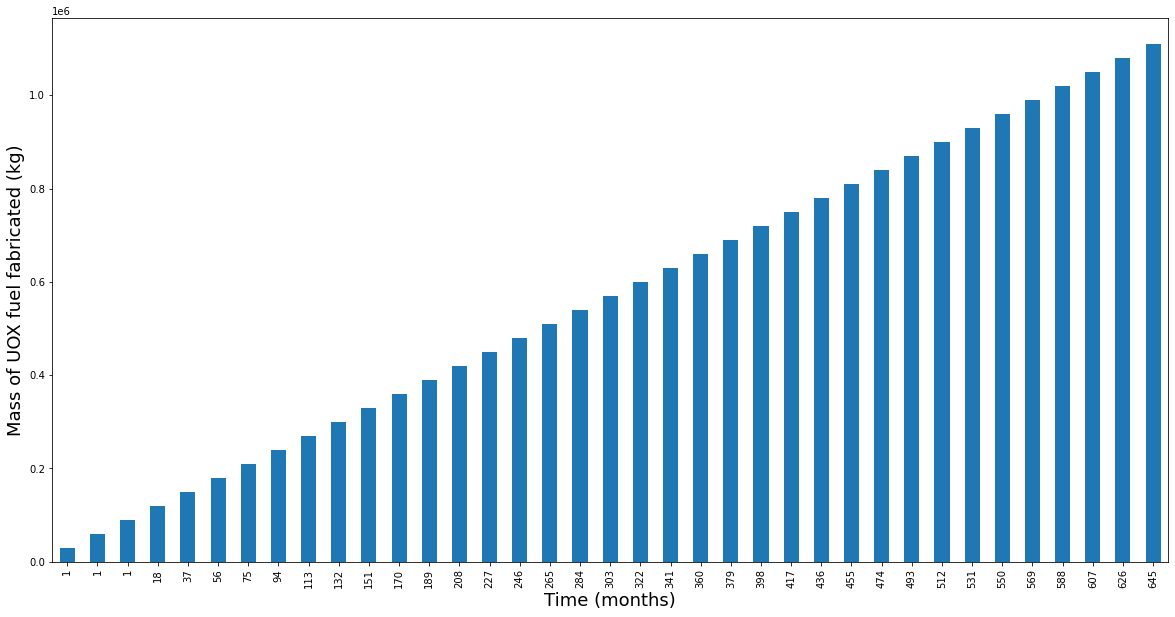

In [61]:
uox[['Time','Total']].plot.bar(x = 'Time', figsize=(20,10), legend=False)
plt.xlabel('Time (months)',fontsize=18); plt.ylabel('Mass of UOX fuel fabricated (kg)',fontsize=18)
plt.show()

In [45]:
uox

,SimId,TransactionId,ResourceId,ObjId,Time,SenderId,ReceiverId,Commodity,Units,Quantity,Total
110,6b4e3634-7dfc-4061-9689-10cca929a10b,110,1035,596,1,73,110,uox,kg,30000.0,30000.0
111,6b4e3634-7dfc-4061-9689-10cca929a10b,111,1041,598,1,73,110,uox,kg,30000.0,60000.0
112,6b4e3634-7dfc-4061-9689-10cca929a10b,112,1047,600,1,73,110,uox,kg,30000.0,90000.0
278,6b4e3634-7dfc-4061-9689-10cca929a10b,278,1685,1012,18,73,110,uox,kg,30000.0,120000.0
488,6b4e3634-7dfc-4061-9689-10cca929a10b,488,2776,1630,37,73,110,uox,kg,30000.0,150000.0
709,6b4e3634-7dfc-4061-9689-10cca929a10b,709,3893,2247,56,73,110,uox,kg,30000.0,180000.0
921,6b4e3634-7dfc-4061-9689-10cca929a10b,921,4772,2780,75,73,110,uox,kg,30000.0,210000.0
1143,6b4e3634-7dfc-4061-9689-10cca929a10b,1143,5873,3378,94,73,110,uox,kg,30000.0,240000.0
1371,6b4e3634-7dfc-4061-9689-10cca929a10b,1371,7002,4000,113,73,110,uox,kg,30000.0,270000.0
1594,6b4e3634-7dfc-4061-9689-10cca929a10b,1594,7931,4551,132,73,110,uox,kg,30000.0,300000.0


In [3]:
evaler.eval('Agents')

UnboundLocalError: local variable 'agent_exit' referenced before assignment